In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Variable Descriptions

#### pH value: 
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended a maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
#### Hardness: 
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
#### Solids (Total dissolved solids - TDS): 
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced an unwanted taste and diluted color in the appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. The desired limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which is prescribed for drinking purposes.
#### Chloramines: 
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
#### Sulfate: 
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
#### Conductivity: 
Pure water is not a good conductor of electric current rather it's a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceed 400 μS/cm.
#### Organic_carbon: 
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to the US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is used for treatment.
#### Trihalomethanes: 
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
#### Turbidity: 
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
#### Potability: 
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [2]:
train_data = pd.read_csv("/content/Train.csv")
train_data.head(10) 

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,region_area_1,3.716080,180.196811,18630.362669,6.330435,NaN,602.990359,15.285013,56.444076,4.500656,0
1,region_area_100,4.270716,217.611599,24405.555346,7.086700,297.951852,359.623910,13.583526,54.589840,3.763906,0
2,region_area_1000,6.648849,232.462013,30733.808648,5.656462,344.670335,267.809179,17.863444,35.411181,4.827527,0
3,region_area_1001,NaN,261.753637,21174.713291,7.314074,NaN,582.848407,15.215849,90.367455,4.217553,0
4,region_area_1002,9.323584,263.484560,15751.480111,5.196259,297.593625,409.878704,10.727265,74.669285,3.006650,0
5,region_area_1003,4.581969,236.871806,33897.373012,6.053592,317.297905,416.487378,19.804848,62.438303,4.500208,0
6,region_area_1004,7.884842,280.016551,21734.132854,7.598271,315.935097,378.875894,11.740399,49.919322,4.631641,0
7,region_area_1005,6.168839,289.074938,24827.821451,7.415200,270.235286,492.778327,22.196990,79.284281,4.435760,0
8,region_area_1007,NaN,285.778488,3901.218702,6.633919,287.510215,563.599032,19.523013,84.962740,4.071344,0
9,region_area_1008,8.693104,235.546700,13284.082864,6.217004,349.299905,571.070910,14.083348,71.848845,2.898223,0


In [3]:
train_data.shape

(2260, 11)

In [4]:
test_data = pd.read_csv("/content/Test.csv")
test_data.head()

,region_area_,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,region_area_0,NaN,255.664346,20791.623791,6.995401,369.261555,574.413654,10.484783,87.105970,2.963135
1,region_area_10,7.360640,216.294688,32452.919220,7.245890,327.369467,435.488419,15.691810,78.855016,3.662292
2,region_area_1006,7.230845,228.348694,17864.994196,5.513418,344.338446,377.794992,20.017950,59.418053,5.622018
3,region_area_1010,4.797460,241.089018,21280.551369,5.883692,327.539307,367.541193,11.818821,63.978068,4.038503
4,region_area_1011,9.319176,250.107456,14294.545161,7.480130,366.796865,348.546450,15.320293,63.506468,4.129230


In [5]:
test_data.shape

(1016, 10)

In [6]:
#Submission file format

ss = pd.read_csv("/content/SampleSubmission.csv")
ss.head(2)

,region_area_,Potability
0,region_area_0,1
1,region_area_10,1


## Exploratory Analysis

In [7]:
test_data.isnull().sum()

region_area_         0
ph                 155
Hardness             0
Solids               0
Chloramines          0
Sulfate            234
Conductivity         0
Organic_carbon       0
Trihalomethanes     51
Turbidity            0
dtype: int64

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_area_     1016 non-null   object 
 1   ph               861 non-null    float64
 2   Hardness         1016 non-null   float64
 3   Solids           1016 non-null   float64
 4   Chloramines      1016 non-null   float64
 5   Sulfate          782 non-null    float64
 6   Conductivity     1016 non-null   float64
 7   Organic_carbon   1016 non-null   float64
 8   Trihalomethanes  965 non-null    float64
 9   Turbidity        1016 non-null   float64
dtypes: float64(9), object(1)
memory usage: 79.5+ KB


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260 entries, 0 to 2259
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region_area_     2260 non-null   object 
 1   ph               1924 non-null   float64
 2   Hardness         2260 non-null   float64
 3   Solids           2260 non-null   float64
 4   Chloramines      2260 non-null   float64
 5   Sulfate          1713 non-null   float64
 6   Conductivity     2260 non-null   float64
 7   Organic_carbon   2260 non-null   float64
 8   Trihalomethanes  2149 non-null   float64
 9   Turbidity        2260 non-null   float64
 10  Potability       2260 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 194.3+ KB


In [10]:
train_data.isnull().sum()

region_area_         0
ph                 336
Hardness             0
Solids               0
Chloramines          0
Sulfate            547
Conductivity         0
Organic_carbon       0
Trihalomethanes    111
Turbidity            0
Potability           0
dtype: int64

In [11]:
print('Percent of missing records are %.2f%%' %((train_data['ph'].isnull().sum()/train_data.shape[0])*100))

Percent of missing records are 14.87%


In [12]:
test_miss_percent = test_data.isnull().sum() * 100 / len(test_data)
missing_test = pd.DataFrame({'column_name': test_data.columns,
                                 'percent_missing': test_miss_percent})
print(missing_test)

                     column_name  percent_missing
region_area_        region_area_         0.000000
ph                            ph        15.255906
Hardness                Hardness         0.000000
Solids                    Solids         0.000000
Chloramines          Chloramines         0.000000
Sulfate                  Sulfate        23.031496
Conductivity        Conductivity         0.000000
Organic_carbon    Organic_carbon         0.000000
Trihalomethanes  Trihalomethanes         5.019685
Turbidity              Turbidity         0.000000


#### Visualizing our data could help us know the type of method to use for filling them

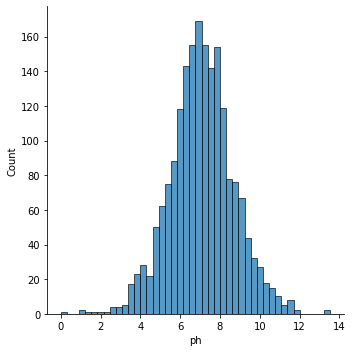

In [13]:
sns.displot(train_data['ph'])

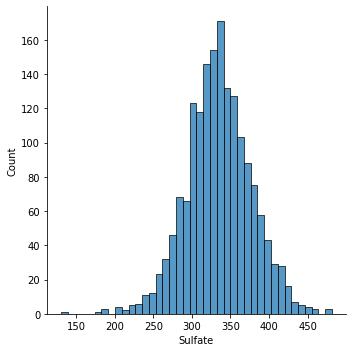

In [14]:
sns.displot(train_data['Sulfate'])

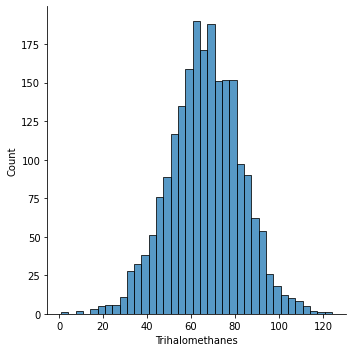

In [15]:
sns.displot(train_data['Trihalomethanes'])

In [16]:
#Filling the missing values 

dataframe = [train_data, test_data]

for df in dataframe:
    
    df['ph'].fillna(df['ph'].mean(), inplace=True)

    #For Sulphate
    df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)

    #For Trihalomethanes
    df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [17]:
train_data.isnull().sum()

region_area_       0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [18]:
test_data.isnull().sum()

region_area_       0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

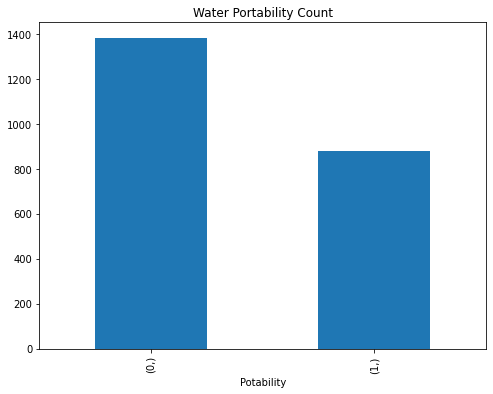

In [19]:
ax = train_data[['Potability']].value_counts().plot(kind='bar', figsize=(8, 6), title="Water Portability Count")

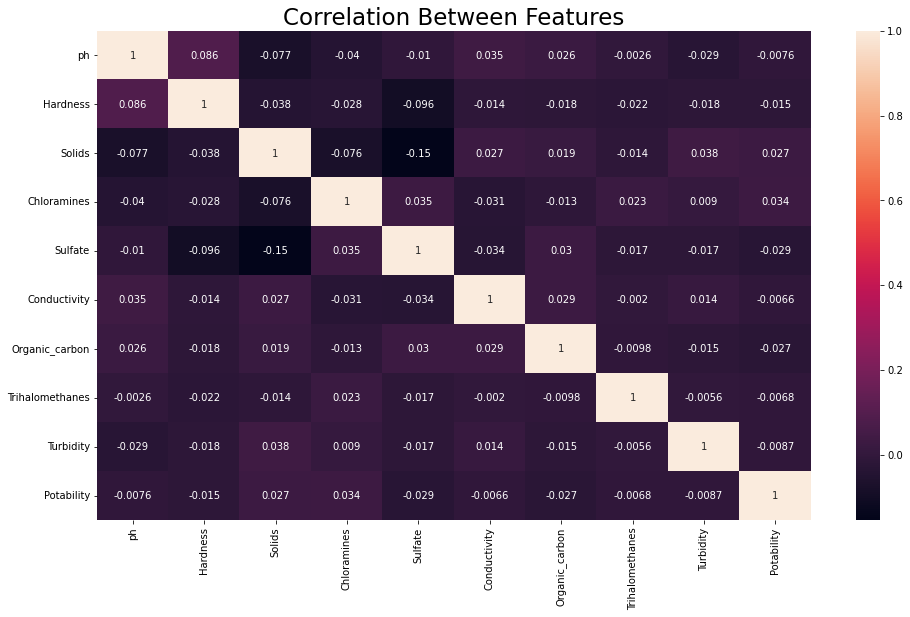

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(train_data.corr(), annot=True)
plt.title("Correlation Between Features", fontsize=23)
plt.show()

In [21]:
train_data[train_data.columns[0:]].corr()['Potability'][:].sort_values(ascending=False)

Potability         1.000000
Chloramines        0.034357
Solids             0.027166
Conductivity      -0.006642
Trihalomethanes   -0.006789
ph                -0.007579
Turbidity         -0.008680
Hardness          -0.015250
Organic_carbon    -0.026848
Sulfate           -0.029157
Name: Potability, dtype: float64

## Feature Engineering

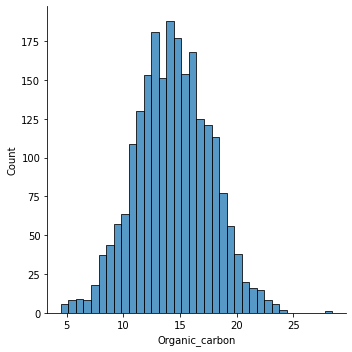

In [22]:
sns.displot(train_data['Organic_carbon'])

In [23]:
dataframe = [train_data, test_data]

for data in dataframe:
  data['ph'] = np.where((data['ph'].values>=6.52) & (data['ph'].values<= 6.83), "safe_ph","unsafe_ph")

  data['Solids'] = np.where((data['Solids'].values>=500) & (data['Solids'].values<=1000), "fair_tds", "high_tds")

  data['Chloramines'] = np.where(data['Chloramines'].values<= 4, "safe_NCl", "unsafe_NCl")

  data['Conductivity'] = np.where(data['Conductivity'].values<= 400, "good_insulator", "conductor")

  data['Trihalomethanes'] = np.where(data['Trihalomethanes'].values<= 80, "safe_THM", "unsafe_THM")

  data['Turbidity'] = np.where(data['Turbidity'].values<= 5, "good_turbidity", "high_turbidity")


dataframe = [train_data, test_data]

#for Hardness
for data in dataframe:
  col         = 'Hardness'
  conditions  = [data[col] < 60, (data[col] > 60) & (data[col] <= 120), (data[col] > 120) &  (data[col] <=180), data[col] > 180]
  choices     = [ "soft_water", 'mod_hard', 'hard', 'very_hard' ]
  data["Hardness_class"] = np.select(conditions, choices, default=np.nan)

#for Sulpahte
for data in dataframe:
  col         = 'Sulfate'
  conditions  = [(data[col] < 3) & (data[col] > 1000), (data[col] == 3) & (data[col] <= 30), (data[col] > 30) &  (data[col] <=1000)]
  choices     = [ "otherwater_s", 'freshwater_s', 'geowater_s' ]
  data["Sulphate_level"] = np.select(conditions, choices, default=np.nan)

#for Organic Carbon
for data in dataframe:
  col         = 'Organic_carbon'
  conditions  = [data[col] <2, (data[col] > 2) & (data[col] < 4), data[col] > 4]
  choices     = [ "treated_water", 'water_treatment', 'others' ]
  data["TDC"] = np.select(conditions, choices, default=np.nan)



In [24]:
region_area_ = test_data['region_area_']

train_data = train_data.drop(["region_area_", "Hardness", "Sulfate", "Organic_carbon"], axis=1)
test_data = test_data.drop(["region_area_", "Hardness", "Sulfate", "Organic_carbon"], axis=1)

In [25]:
train_data.head(10)

,ph,Solids,Chloramines,Conductivity,Trihalomethanes,Turbidity,Potability,Hardness_class,Sulphate_level,TDC
0,unsafe_ph,high_tds,unsafe_NCl,conductor,safe_THM,good_turbidity,0,very_hard,geowater_s,others
1,unsafe_ph,high_tds,unsafe_NCl,good_insulator,safe_THM,good_turbidity,0,very_hard,geowater_s,others
2,safe_ph,high_tds,unsafe_NCl,good_insulator,safe_THM,good_turbidity,0,very_hard,geowater_s,others
3,unsafe_ph,high_tds,unsafe_NCl,conductor,unsafe_THM,good_turbidity,0,very_hard,geowater_s,others
4,unsafe_ph,high_tds,unsafe_NCl,conductor,safe_THM,good_turbidity,0,very_hard,geowater_s,others
5,unsafe_ph,high_tds,unsafe_NCl,conductor,safe_THM,good_turbidity,0,very_hard,geowater_s,others
6,unsafe_ph,high_tds,unsafe_NCl,good_insulator,safe_THM,good_turbidity,0,very_hard,geowater_s,others
7,unsafe_ph,high_tds,unsafe_NCl,conductor,safe_THM,good_turbidity,0,very_hard,geowater_s,others
8,unsafe_ph,high_tds,unsafe_NCl,conductor,unsafe_THM,good_turbidity,0,very_hard,geowater_s,others
9,unsafe_ph,high_tds,unsafe_NCl,conductor,safe_THM,good_turbidity,0,very_hard,geowater_s,others


## Mapping/Encoding

In [26]:
train_data['Potability']=train_data['Potability'].astype('category')
train_data['Potability']=train_data['Potability'].astype('int')

In [27]:
# Extract categorical train_data
cat_cols = []

for col in train_data.columns:
    if train_data[col].dtype == 'O':
        cat_cols.append(col)

for col in cat_cols:

    train_data[col] = pd.factorize(train_data[col])[0]        

In [28]:
# Extract categorical test_data
catt_cols = []

for col in test_data.columns:
    if test_data[col].dtype == 'O':
        catt_cols.append(col)

for col in catt_cols:

    test_data[col] = pd.factorize(test_data[col])[0] 

In [29]:
train_data.head()

,ph,Solids,Chloramines,Conductivity,Trihalomethanes,Turbidity,Potability,Hardness_class,Sulphate_level,TDC
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [30]:
test_data.head()

,ph,Solids,Chloramines,Conductivity,Trihalomethanes,Turbidity,Hardness_class,Sulphate_level,TDC
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,1,1,1,0,0,0
3,0,0,0,1,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0


In [31]:
train_data.shape, test_data.shape

((2260, 10), (1016, 9))

## Modelling

## Model 1

In [32]:
#Split my data

y = train_data['Potability']
X = train_data.drop(['Potability'],axis=1)

test_df = test_data

In [33]:
!pip install catboost --quiet

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [34]:
!pip install lightgbm --quiet

In [35]:
import lightgbm as lgb 
from lightgbm import LGBMClassifier   
model = lgb.LGBMClassifier(random_state=42,n_estimators=1000,silent=False, 
                       scale_pos_weight= 5,colsample_bylevel=0.8,subsample=0.8)  
model.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bylevel=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               scale_pos_weight=5, silent=False, subsample=0.8,
               subsample_for_bin=200000, subsample_freq=0)

In [36]:
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': X.columns})
fea_imp.sort_values(by='imp',ascending=False,inplace=True)
fea_imp.head(30)

,imp,col
3,4731,Conductivity
4,2635,Trihalomethanes
5,1556,Turbidity
0,1197,ph
2,1072,Chloramines
6,1007,Hardness_class
1,0,Solids
7,0,Sulphate_level
8,0,TDC


In [37]:
index_to_use_later = ss['region_area_'].values

In [38]:
cols=list(X.columns)

In [39]:
output= model.predict_proba(test_df[cols])

In [40]:
submission_df = pd.DataFrame(columns=['region_area_','Potability'])    
submission_df['region_area_'] = index_to_use_later
submission_df['Potability'] = output[:,1]

In [41]:
submission_df['Potability']=np.where(submission_df['Potability'] > 0.3,1,0)

submission_df.to_csv('water_com.csv',index=False)            # xxxxx on LB  
submission_df.head() 

,region_area_,Potability
0,region_area_0,1
1,region_area_10,1
2,region_area_1006,1
3,region_area_1010,1
4,region_area_1011,1


In [42]:
submission_df['Potability'].value_counts()

1    1014
0       2
Name: Potability, dtype: int64